In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_excel('final_data.xlsx')
df

,NO.TRANSAKSI,DATE,DESCRIPTION,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML.,1
1,2301011000001,2023-01-01,STELLA MTC F/C 225ML.REF /12,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA@50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G.W/30 LG07507,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE/40 SM,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM/40 IKA,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM/40 KA75,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40-20234,1


In [3]:
# Cek Missing Value
df.isna().sum()

NO.TRANSAKSI    0
DATE            0
DESCRIPTION     0
QTY             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO.TRANSAKSI  21934 non-null  int64         
 1   DATE          21934 non-null  datetime64[ns]
 2   DESCRIPTION   21934 non-null  object        
 3   QTY           21934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 685.6+ KB


### **Total Pelanggan**

In [5]:
# Menghitung jumlah customer unik dari kolom NO.TRANSAKSI
total_customers = df['NO.TRANSAKSI'].nunique()
total_customers

3554

In [6]:
# Filter data untuk menghapus duplikat berdasarkan kolom NO.TRANSAKSI
df_unique = df.drop_duplicates(subset='NO.TRANSAKSI')
df_unique

,NO.TRANSAKSI,DATE,DESCRIPTION,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML.,1
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G.W/30 LG07507,2
6,2301011000003,2023-01-01,SANIA T.TERIGU 1KG. /10,1
12,2301011000004,2023-01-01,SWALLOW NAPTH 100G S-125,1
20,2301011000005,2023-01-01,WALLS MAGNUM V.ALMD/24 .70743,2
...,...,...,...,...
21895,2312311020095,2023-12-31,SANIA T.TERIGU 1KG. /10,1
21897,2312311020096,2023-12-31,PIXY DEO'S WOODY 34G,2
21902,2312311020097,2023-12-31,BAYFRESH REED D.SAKURA/6 BRD02,1
21907,2312311020098,2023-12-31,GARUDA ROSTA 100G/30 ORBM,1


### **Frekuensi Pelanggan Harian**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10496\933288712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['DATE'] = pd.to_datetime(df_unique['DATE'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10496\933288712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['DAY_OF_WEEK'] = df_unique['DATE'].dt.day_name()


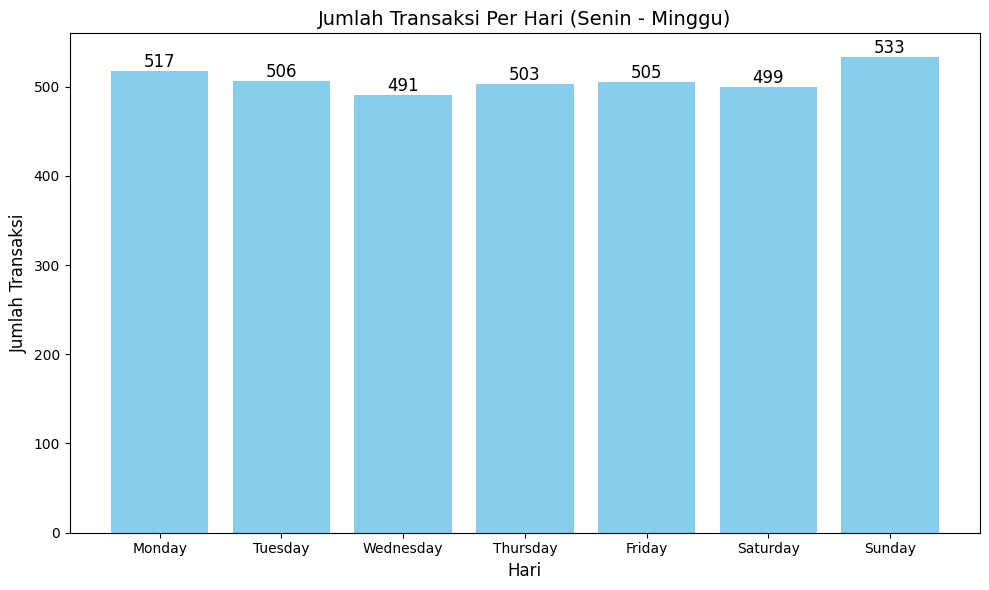

In [16]:
# Ubah kolom 'DATE' menjadi tipe datetime
df_unique['DATE'] = pd.to_datetime(df_unique['DATE'])
df_unique['DAY_OF_WEEK'] = df_unique['DATE'].dt.day_name()

# Hitung jumlah transaksi per hari (Senin-Minggu)
transaction_per_day = df_unique.groupby('DAY_OF_WEEK')['NO.TRANSAKSI'].count()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_per_day = transaction_per_day.reindex(ordered_days)

plt.figure(figsize=(10,6))
bars = plt.bar(transaction_per_day.index, transaction_per_day.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12)

plt.title('Jumlah Transaksi Per Hari (Senin - Minggu)', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.tight_layout()
plt.show()

### **Frekuensi Pelanggan Mingguan**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12796\189198379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['WEEKDAY'] = df_unique['DATE'].dt.weekday
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12796\189198379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['IS_WEEKEND'] = np.where(df_unique['WEEKDAY'] >= 5, 'Weekend', 'Weekday')


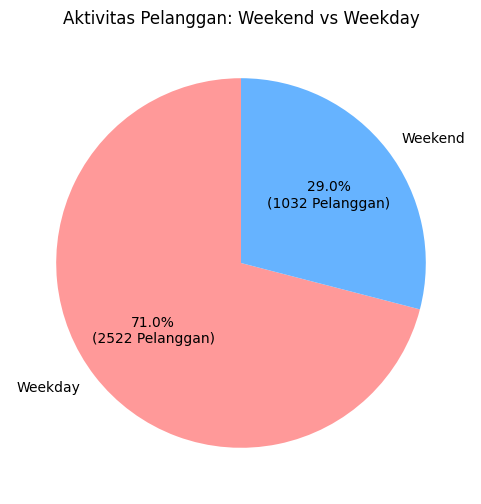

In [19]:
# Menambahkan kolom untuk membedakan weekend/weekday
df_unique['WEEKDAY'] = df_unique['DATE'].dt.weekday
df_unique['IS_WEEKEND'] = np.where(df_unique['WEEKDAY'] >= 5, 'Weekend', 'Weekday')

# Visualisasi Pie Chart: Aktivitas pelanggan di Weekend vs Weekday
weekend_weekday_counts = df_unique['IS_WEEKEND'].value_counts()
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f'{pct:.1f}%\n({absolute} Pelanggan)'

plt.figure(figsize=(6,6))
plt.pie(weekend_weekday_counts, 
        labels=weekend_weekday_counts.index, 
        autopct=lambda pct: func(pct, weekend_weekday_counts),
        startangle=90, 
        colors=['#ff9999','#66b3ff'])
plt.title('Aktivitas Pelanggan: Weekend vs Weekday')
plt.show()

In [20]:
df_unique.tail(100)

,NO.TRANSAKSI,DATE,DESCRIPTION,QTY,DAY,WEEKDAY,IS_WEEKEND
21506,2312231000211,2023-12-23,TEH GELAS ORI 160ML/24 6351,14,Saturday,5,Weekend
21509,2312231000212,2023-12-23,SOSOFT DET LIQ 700 RF.NAT.6-92,1,Saturday,5,Weekend
21512,2312231000213,2023-12-23,TELOR HORN,422,Saturday,5,Weekend
21525,2312231000214,2023-12-23,CLUB 1500ML./12 3015,1,Saturday,5,Weekend
21547,2312231000215,2023-12-23,BERAS AGUNG 5KG. /8,1,Saturday,5,Weekend
...,...,...,...,...,...,...,...
21895,2312311020095,2023-12-31,SANIA T.TERIGU 1KG. /10,1,Sunday,6,Weekend
21897,2312311020096,2023-12-31,PIXY DEO'S WOODY 34G,2,Sunday,6,Weekend
21902,2312311020097,2023-12-31,BAYFRESH REED D.SAKURA/6 BRD02,1,Sunday,6,Weekend
21907,2312311020098,2023-12-31,GARUDA ROSTA 100G/30 ORBM,1,Sunday,6,Weekend


In [21]:
senin_data = df_unique[df_unique['DAY'] == 'Monday']
senin_data

,NO.TRANSAKSI,DATE,DESCRIPTION,QTY,DAY,WEEKDAY,IS_WEEKEND
64,2301021000001,2023-01-02,HANGER SANDY HITAM,1,Monday,0,Weekday
72,2301021000002,2023-01-02,CHOKI-CHOKI 4X9G/18/4 410051,18,Monday,0,Weekday
79,2301021000003,2023-01-02,KRIPIK SINGKONG,100,Monday,0,Weekday
80,2301021000004,2023-01-02,CHITATO AYAM BBQ/30 CTCHB68,1,Monday,0,Weekday
90,2301021000005,2023-01-02,HAPPY SWEET GULA 1KG/24,2,Monday,0,Weekday
...,...,...,...,...,...,...,...
21603,2312251020016,2023-12-25,SWALLOW COLOR BALL@5 S-109,3,Monday,0,Weekday
21606,2312251020017,2023-12-25,GILLETE GOAL 3'S+1/12 .20905E,1,Monday,0,Weekday
21614,2312251020018,2023-12-25,GOLDA CAPPUCINO 200ML/12 20289,1,Monday,0,Weekday
21615,2312251020019,2023-12-25,INDOCAFE CAPPUCINO BOX/24 H901,1,Monday,0,Weekday
